# Statistical Pattern Recognition - Exercise 6: Gaussian processes

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel
import warnings


## Define plot function 

We test it on [this example from sklearn](https://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html#sphx-glr-auto-examples-gaussian-process-plot-gpr-noisy-targets-py)

To plot the 95% confidence interval we look up the z-score for the standard normal distribution.
Assume a standard normal with mean 0, std 1, then for input value x=1.96 the cumulative density is 0.975.
This means 97.5% of all probability mass is to the left of x.
If we now cut off left of -1.96 and right of 1.96 we will have 95% of the probability mass inside those boundaries.

```python
# import scipy.stats
# z_score = stats.norm.ppf(0.975)  # ~1.96
```

Ppf here means percent-point function (inverse of the cumulative density function or CDF) for a standard normal distribution.


In [3]:
def plot_gp(mu, cov, x, x_train=None, y_train=None, label="Pred"):
    """
        mu: mean prediction, shape (N, 1)
        cov: prediction covariance, shape (N, N)
        x: inputs to predict for, shape (N, 1)
        x_train: observation inputs, shape (N_obs, 1)
        y_train: obersvation labels, shape (N_obs,)
    """
    x, mu = x.ravel(), mu.ravel()  # flatten both to shape (N, )
    uncertainty = 1.96 * np.sqrt(np.diag(cov))

    plt.fill_between(x, mu + uncertainty, mu - uncertainty, alpha=0.1)
    plt.plot(x, mu, label=label)

    if x_train is not None:
        n_samples = x_train.shape[0]
        plt.plot(x_train, y_train, "rx", label=f"{n_samples} train samples")
    plt.legend()


gaussian_process.kernel_=1**2 * RBF(length_scale=1)


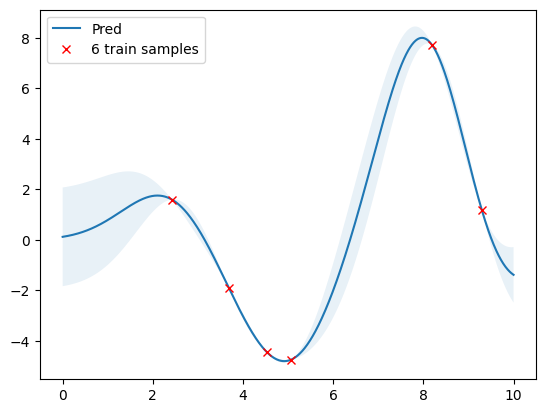

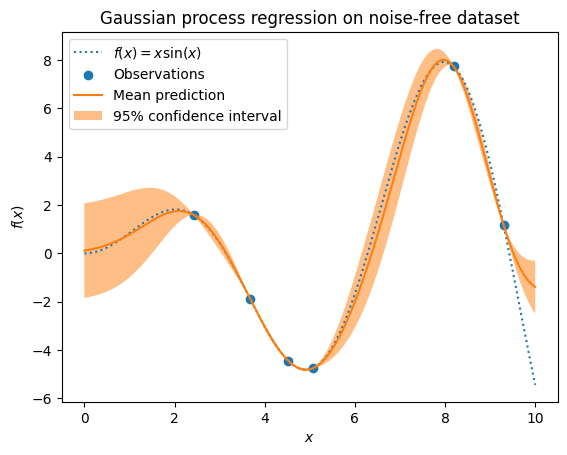

In [4]:
# run the gp example from sklearn
e_x = np.linspace(start=0, stop=10, num=1_000).reshape(-1, 1)
e_y = np.squeeze(e_x * np.sin(e_x))
rng = np.random.RandomState(1)
training_indices = rng.choice(np.arange(e_y.size), size=6, replace=False)
e_x_train, e_y_train = e_x[training_indices], e_y[training_indices]
kernel = 1 * RBF(length_scale=1.0, length_scale_bounds=(1e-2, 1e2))
gaussian_process = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=9)
gaussian_process = GaussianProcessRegressor(kernel=kernel, optimizer=None)
gaussian_process.fit(e_x_train, e_y_train)
print(f"{gaussian_process.kernel_=}")

# run our plot code
mu, cov = gaussian_process.predict(e_x, return_cov=True)
plot_gp(mu, cov, e_x, e_x_train, e_y_train)
plt.show()

# compare with sklearn's plot code
mean_prediction, std_prediction = gaussian_process.predict(e_x, return_std=True)
plt.plot(e_x, e_y, label=r"$f(x) = x \sin(x)$", linestyle="dotted")
plt.scatter(e_x_train, e_y_train, label="Observations")
plt.plot(e_x, mean_prediction, label="Mean prediction")
plt.fill_between(
    e_x.ravel(),
    mean_prediction - 1.96 * std_prediction,
    mean_prediction + 1.96 * std_prediction,
    alpha=0.5,
    label=r"95% confidence interval",
)
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.title("Gaussian process regression on noise-free dataset")
plt.show()


## $\star$ Part 1: Gaussian process

### Part 1.1: Run a Gaussian Process Regressor using sklearn

Load the points from regression.npz. 

Estimate the mean prediction and the variance using a Gaussian process and plot both in the style of last week’s assignment. 

Use an RBF kernel (a Gaussian function). Play
with the hyperparameters (which hyperparameters do you have?) and see
the effect in the predictive distribution. 

Reduce the number of samples and
repeat the experiments.


In [5]:
# START TODO ################
# Load data and reshape it into X_train shape (N, 1) and Y_train shape (N,)
# Create a suitable range X_test for testing
data = np.load('../data/regression.npz')
data = data['arr_0']
X = data[:, 0].reshape(-1, 1)
Y = data[:, 1]









# END TODO ################


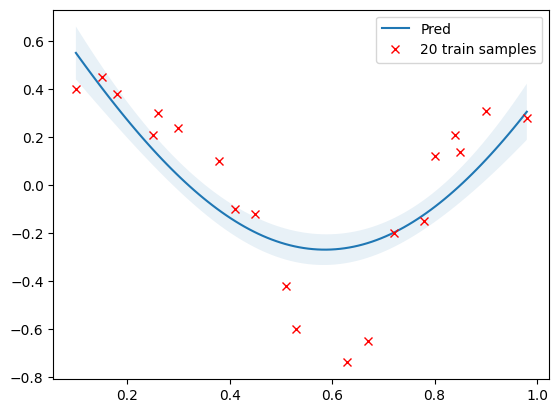

In [43]:
# START TODO ################
# Create a function that fits a GP using sklearn and run the function on the data
def gaussian_process(x, y, X_pred, alpha = 1e-2):
    kernel = 1 * ConstantKernel(1**2, constant_value_bounds="fixed")*RBF(length_scale=1.0, length_scale_bounds="fixed")
    gaussian_process = GaussianProcessRegressor(kernel=kernel, optimizer=None, alpha=alpha)
    gaussian_process.fit(x, y)



    
    mu_pred, cov_pred = gaussian_process.predict(X_pred, return_cov=True)

    return mu_pred, cov_pred
# END TODO ################
X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
mu_pred, cov_pred = gaussian_process(X, Y, X_pred)
plot_gp(mu_pred, cov_pred, X_pred, X, Y)


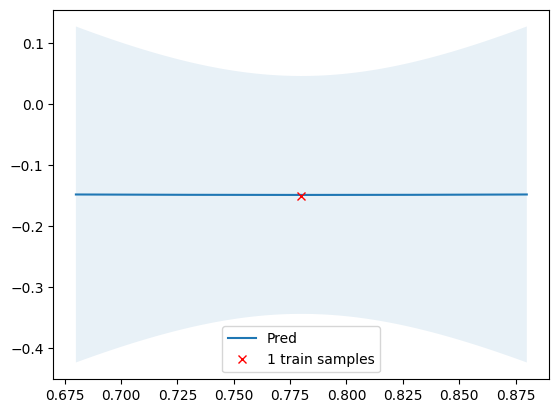

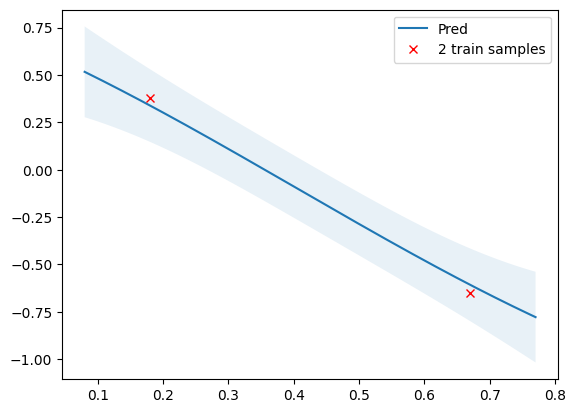

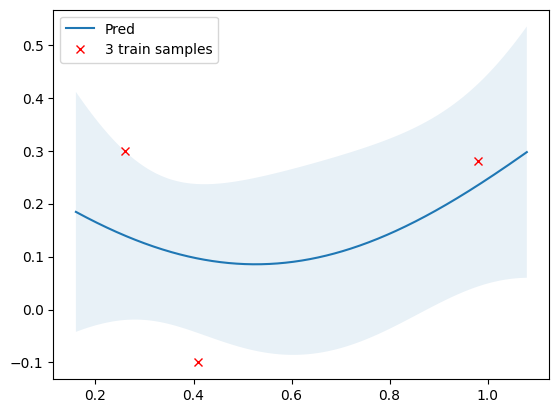

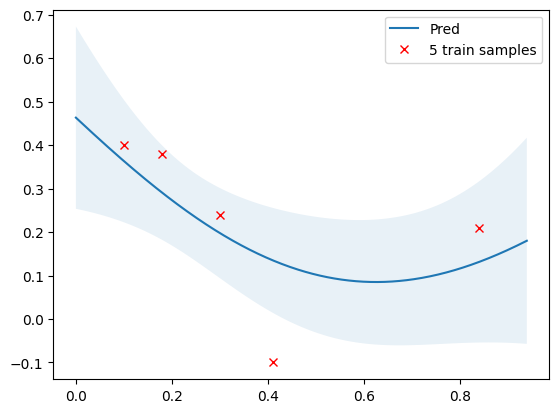

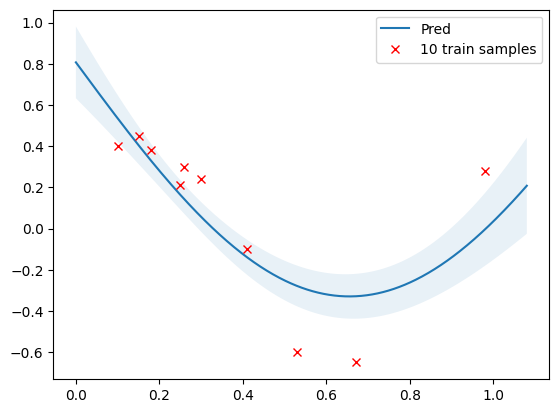

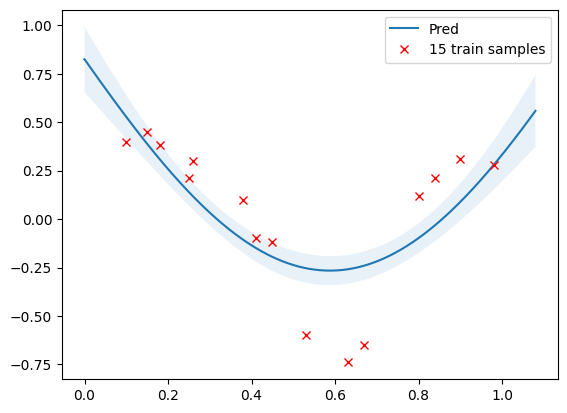

In [50]:
# START TODO ################
# Randomly subsample your data and run the GP on [1, 2, 3, 5, 10, 20] datapoints.
# What do you observe?
import random
def subsample(x, y , size, random_state = None):
    rng = np.random.default_rng(random_state)
     
    test_set_size = x.size - size
    test_indices = rng.choice(np.arange(x.size), size=test_set_size, replace=False)
    X_test = x[test_indices]
    Y_test = y[test_indices]
    test_set = set(test_indices)
    train_indices = list(set(range(x.size)) - test_set)
    X_train = x[train_indices]
    Y_train = y[train_indices]

    
    return X_train, Y_train, X_test, Y_test
# END TODO  ################

for i in [1, 2, 3, 5, 10, 15]:
    X_train, Y_train, X_test, Y_test = subsample(X,Y,size=i, random_state=42)
    
    X_pred = np.linspace(X_train.min()-0.1, X_train.max()+0.1, 500, endpoint=True).reshape(-1, 1)
    
    mu_pred, cov_pred = gaussian_process(X_train, Y_train, X_pred)
    plot_gp(mu_pred, cov_pred, X_pred, X_train, Y_train)
    plt.show()




Plot for alpha = 100.0
Plot for alpha = 2.5118864315095797
Plot for alpha = 0.0630957344480193
Plot for alpha = 0.0015848931924611108
Plot for alpha = 3.9810717055349695e-05
Plot for alpha = 1e-06


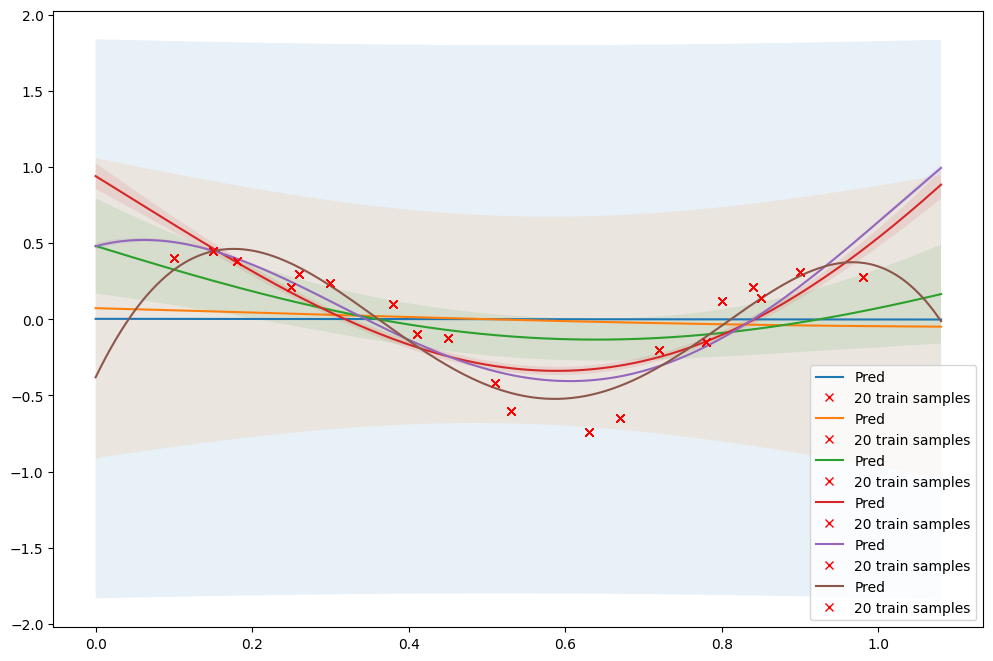

In [54]:
# START TODO ################
# Go back to the full dataset and play with the other hyperparameters.
plt.figure(figsize=(12, 8))
for alpha in np.logspace(2, -6, 6):
    print(f'Plot for alpha = {alpha}')
    X_pred = np.linspace(X_train.min()-0.1, X_train.max()+0.1, 500, endpoint=True).reshape(-1, 1)
    mu_pred, cov_pred = gaussian_process(X, Y, X_pred, alpha=alpha)
     
    
    plot_gp(mu_pred, cov_pred, X_pred, X, Y)
    
    
# END TODO ################


### Part 1.2: Now, implement your own rbf_kernel function and MyGPRegressor class.



In [61]:
# START TODO ################
# Now, implement your own rbf_kernel function and MyGPRegressor class.
def rbf_kernel(X1, X2, length_scale=1.0, sigma_f=1.0):
    """
    Computes the RBF kernel matrix between X1 and X2.
    X1: (n1, d)
    X2: (n2, d)
    Returns: (n1, n2) kernel matrix
    """
    # Compute squared Euclidean distances:
    sqdist = np.sum(X1**2, axis=1).reshape(-1, 1) + \
             np.sum(X2**2, axis=1) - 2 * np.dot(X1, X2.T)
    return sigma_f**2 * np.exp(-0.5 / length_scale**2 * sqdist)
class MyGPRegressor:
    def __init__(self, kernel, alpha = 0.01):
        self.alpha = alpha
        self.kernel = kernel
# alpha is apparantely corresponding to the beta value in the lecture slides
    def fit(self, X_train, Y_train):
        n = len(X_train)
        self.C_n = self.kernel(X_train,X_train) + self.alpha * np.eye(n)
        self.C_n_inv = np.linalg.inv(self.C_n)
        self.X_train = X_train
        self.Y_train = Y_train
        return self
        
    def predict(self, X_n):
        K_s = self.kernel(self.X_train, X_n)
        mean = K_s.T @ self.C_n_inv @ self.Y_train
        cov = self.kernel(X_n,X_n) + self.alpha * np.eye(len(X_n)) -K_s.T @ self.C_n_inv @ K_s
        
        return mean, cov
    



# END TODO ################


(500,) (500, 500) (500, 1)


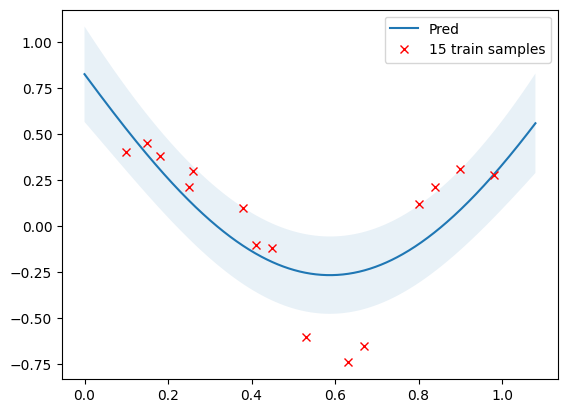

In [63]:
# START TODO ################
# Run your implementation on the data.
X_train, Y_train, X_test, Y_test = subsample(X,Y,size=15, random_state=42)
model = MyGPRegressor(kernel = rbf_kernel)
model.fit(X_train, Y_train)

X_pred = np.linspace(X_train.min()-0.1, X_train.max()+0.1, 500, endpoint=True).reshape(-1, 1)
preds, var = model.predict(X_pred)
print(np.shape(preds), np.shape(var), np.shape(X_pred), )
plot_gp(preds, var, X_pred, X_train, Y_train)


# END TODO ################


In [ ]:
# START TODO ################
# Play with the beta parameter of MyGPRegressor and also length and sigma_f parameters of rbf_kernel
# Observe how these *hyperparameters* change the data fit. Try to reason why you obtain these different results.
raise NotImplementedError
# END TODO ################
